In [ ]:
Установка нужных библиотек. Если таковые уже имеются, то можно пропустить или,
что лучше, проверить обновление библиотек

In [1]:
!python.exe -m pip install --upgrade pip

%pip install deap
%pip install numpy
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\object_detection\TFODCourse\Omar\Scripts\python.exe -m pip install --upgrade pip


In [ ]:
Импорт всего, что нужно

In [2]:
from deap import creator, base, tools
import random
import matplotlib.pyplot as plt

In [ ]:
Создадим некоторые константы для работы

In [4]:
#Константы задачи
ONE_TO_MAX_LENGTH = 100

#Константы Г.А.
POPULATION_SIZE=200
P_CROSSOVER=0.9
P_MUTATION=0.1
MAX_GENERATIONS=50

In [3]:
Сделаем генератор случайных чисел, чтобы внести щепотку хаоса в эту кашу

In [6]:
RANDOM_SEED = random.randint(-,100)
random.seed(RANDOM_SEED)

In [3]:
Сделаем функцию генерации случайных чисел в лист, заполняя его 

In [7]:
toolbox = base.Toolbox()
toolbox.register("zerotoOne", random.randint,0,1)

In [7]:
Создаём класс FitnessMax

In [8]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [7]:
Создаём класс индивидуума для работы

In [10]:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [9]:
После чего создаём экземпляры этого класса

In [11]:
toolbox.register("individualCreator", tools.initRepeat, 
                 creator.Individual, toolbox.zerotoOne, ONE_TO_MAX_LENGTH)

In [9]:
И, наконец, создаём популяцию дебилов

In [12]:
toolbox.register("populationCreator",tools.initRepeat,
                list, toolbox.individualCreator)

In [12]:
Объявим функцию приспособленности и зарегистрируем её

In [13]:
def oneToMax(individual):
    return sum(individual),

toolbox.register("evaulate", oneToMax)

In [13]:
Объявим генетические операторы

In [14]:
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mate",tools.cxOnePoint)
toolbox.register("mutate",tools.mutFlipBit, indpb=1.0/ONE_TO_MAX_LENGTH)

In [13]:
ЭВОЛЮЦИЯ РЕШЕНИЯ

In [18]:
def main():
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0
    
    fitnessValues = list(map(toolbox.evaulate, population))
    
    for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values= fitnessValue
        
    fitnessValues = [individual.fitness.values[0] for individual in population]
    
    maxFitnessValues = []
    meanFitnessValues = []
    
    while max(fitnessValues) < ONE_TO_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
        generationCounter = generationCounter + 1
        
        offspring = toolbox.select(population, len(population))
        
        offspring = list(map(toolbox.clone, offspring))
        
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
                
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values
                
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaulate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue
            
        population[:]= offspring
        
        fitnessValues = [ind.fitness.values[0] for ind in population]
        
        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Поколение {}: Макс. приспособленность = {}, Средняя приспособленность =  {}".
             format(generationCounter,maxFitness, meanFitness))
        
        best_index = fitnessValues.index(max(fitnessValues))
        print("Лучший индивидуум = ", *population[best_index], "\n")

- Поколение 1: Макс. приспособленность = 67.0, Средняя приспособленность =  54.475
Лучший индивидуум =  1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 

- Поколение 2: Макс. приспособленность = 69.0, Средняя приспособленность =  58.005
Лучший индивидуум =  1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 

- Поколение 3: Макс. приспособленность = 69.0, Средняя приспособленность =  61.215
Лучший индивидуум =  1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 

- Поколение 4: Макс. приспособленность = 74.0, Средняя приспособленность =  64.355

- Поколение 34: Макс. приспособленность = 99.0, Средняя приспособленность =  97.835
Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Поколение 35: Макс. приспособленность = 99.0, Средняя приспособленность =  98.02
Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Поколение 36: Макс. приспособленность = 99.0, Средняя приспособленность =  98.345
Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

- Поколение 37: Макс. приспособленность = 99.0, Средняя приспособленность =  98.

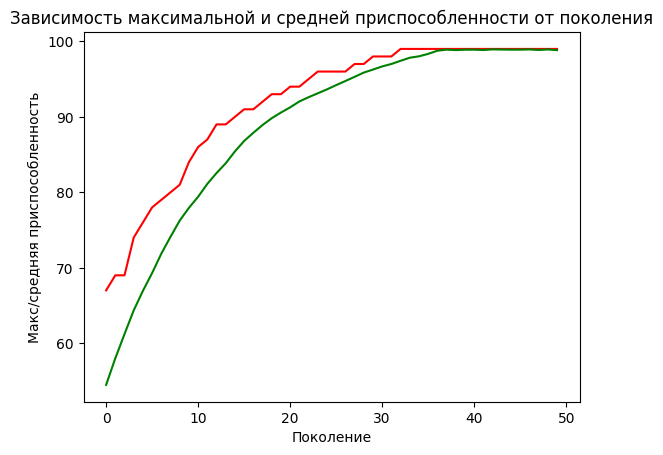

In [19]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color = "green")
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()